In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('insurance_data.csv')

In [3]:
data.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [4]:
data.shape

(27, 2)

In [5]:
data.head(10)

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


In [6]:
data[data['age']==data['age'].max()]

,age,bought_insurance
8,62,1


In [7]:
data[data['bought_insurance']==1]

,age,bought_insurance
2,47,1
4,46,1
5,56,1
7,60,1
8,62,1
9,61,1
14,49,1
15,55,1
16,25,1
17,58,1


In [10]:
import matplotlib.pyplot as plt 

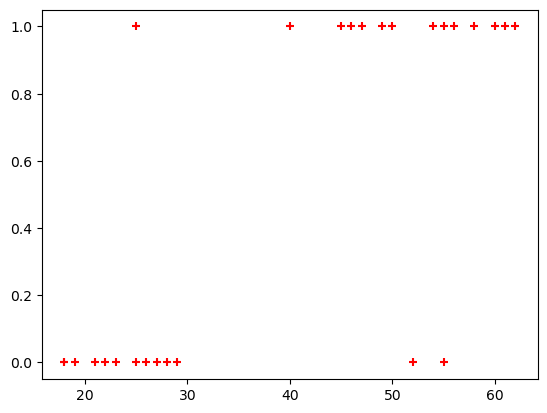

In [11]:
plt.scatter(data['age'], data['bought_insurance'],marker='+', color='red')

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
X=data.drop(columns='bought_insurance', axis=1)
Y=data['bought_insurance']

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,random_state=42,test_size=0.1)

In [23]:
X_train.shape

(24, 1)

In [24]:
X_test.shape

(3, 1)

In [25]:
X_test

,age
8,62
13,29
9,61


In [26]:
model=LogisticRegression()

In [27]:
model.fit(X_train,Y_train)

LogisticRegression()

In [28]:
Y_test

8     1
13    0
9     1
Name: bought_insurance, dtype: int64

In [30]:
X_pred_Test=model.predict(X_test)

In [32]:
model.score(X_test,Y_test)

1.0

In [33]:
model.score(X_train, Y_train)

0.875

In [34]:
X_pred_Test

array([1, 0, 1], dtype=int64)

In [35]:
model.predict_proba(X_test)

array([[0.04794177, 0.95205823],
       [0.77002692, 0.22997308],
       [0.05409225, 0.94590775]])

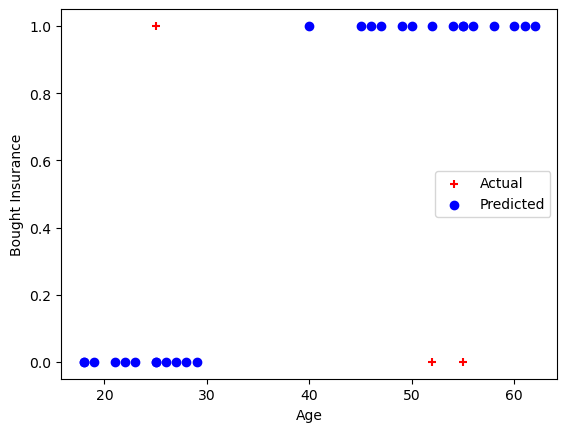

In [36]:
y_pred = model.predict(data[['age']]) 

#plot actual
plt.scatter(data['age'], data['bought_insurance'], marker='+', color='red', label='Actual')

#Plot predicted 
plt.scatter(data['age'], y_pred, marker='o', color='blue', label='Predicted')

plt.xlabel('Age')
plt.ylabel('Bought Insurance')
plt.legend()
plt.show()